In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
#将那些用matplotlib绘制的图显示在页面里而不是弹出一个窗口
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # 转换成 one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [3]:
# Load the data
train = pd.read_csv("data/digit-recognizer/train.csv")
test = pd.read_csv("data/digit-recognizer/test.csv")

After exploring the data we reveal that it is actually 28x28 size of B/W image, which the value range from (0-255) <br>
THe first column indicate the corresponding label for training data <br>
Now we get ready to normalize the data. <br>

In [4]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train = train.values[:,1:]
Y_train = train.values[:,0]
test=test.values

In [7]:
X_train = X_train/255
test = test/255

In [8]:
X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

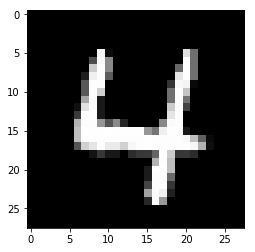

In [9]:
mnist_img = X_train[42, :, :, 0]
plt.imshow(mnist_img, cmap='Greys_r')

In [10]:
Y_train = to_categorical(Y_train, num_classes=10)

In [11]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.1)

In [12]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [13]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [14]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
epochs = 30 
batch_size = 86

In [16]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # 使输入数据集去中心化（均值为0）, 按feature执行
        samplewise_center=False,  # 使输入数据的每个样本均值为0
        featurewise_std_normalization=False,  # 将输入除以数据集的标准差以完成标准化, 按feature执行
        samplewise_std_normalization=False,  # 将输入的每个样本除以其自身的标准差
        zca_whitening=False,  # 对输入数据施加ZCA白化
        rotation_range=10,  # 数据增强时图片随机转动的角度
        zoom_range = 0.1, # 随机缩放的幅度
        width_shift_range=0.1,  # 图片宽度的某个比例，数据增强时图片水平偏移的幅度
        height_shift_range=0.1,  # 图片高度的某个比例，数据增强时图片竖直偏移的幅度
        horizontal_flip=False,  # 进行随机水平翻转
        vertical_flip=False)  # 进行随机竖直翻转

In [18]:
datagen.fit(X_train)

In [19]:
import datetime
starttime = datetime.datetime.now()

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_validate,Y_validate),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

endtime = datetime.datetime.now()

print ((endtime - starttime).seconds)

Epoch 1/30
 - 16s - loss: 0.4281 - acc: 0.8633 - val_loss: 0.0475 - val_acc: 0.9852
Epoch 2/30
 - 13s - loss: 0.1287 - acc: 0.9615 - val_loss: 0.0608 - val_acc: 0.9805
Epoch 3/30
 - 13s - loss: 0.0966 - acc: 0.9712 - val_loss: 0.0291 - val_acc: 0.9905
Epoch 4/30
 - 13s - loss: 0.0818 - acc: 0.9767 - val_loss: 0.0267 - val_acc: 0.9921
Epoch 5/30
 - 13s - loss: 0.0734 - acc: 0.9789 - val_loss: 0.0239 - val_acc: 0.9917
Epoch 6/30
 - 13s - loss: 0.0692 - acc: 0.9793 - val_loss: 0.0276 - val_acc: 0.9917
Epoch 7/30
 - 13s - loss: 0.0660 - acc: 0.9807 - val_loss: 0.0220 - val_acc: 0.9931
Epoch 8/30
 - 13s - loss: 0.0645 - acc: 0.9819 - val_loss: 0.0251 - val_acc: 0.9936
Epoch 9/30
 - 13s - loss: 0.0601 - acc: 0.9828 - val_loss: 0.0210 - val_acc: 0.9940
Epoch 10/30
 - 14s - loss: 0.0641 - acc: 0.9818 - val_loss: 0.0194 - val_acc: 0.9945
Epoch 11/30
 - 16s - loss: 0.0644 - acc: 0.9820 - val_loss: 0.0258 - val_acc: 0.9933
Epoch 12/30
 - 15s - loss: 0.0641 - acc: 0.9825 - val_loss: 0.0278 - val_a

In [20]:
results = model.predict(test)

In [21]:
results = np.argmax(results,axis = 1)

In [23]:
results = pd.Series(results,name="Label")

In [25]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [26]:
submission.to_csv("output/digit-recognizer/keras_CNN.csv",index=False)